# Exploratory Data Analysis and Stock Price and Stock Price Trend Prediction

In [29]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
%matplotlib inline
import seaborn as sns

import warnings
import matplotlib.pyplot as plt
import functools as ft
#import pandas_talib as TA
import operator
import datetime
from sklearn.preprocessing import MinMaxScaler
import fix_yahoo_finance as yf
yf.pdr_override()

# Exploratory Data Analysis

In [49]:
start = "2017-01-01" 
end = "2018-01-01"

In [50]:
AAPL = pdr.get_data_yahoo("AAPL",start,end)
GOOG = pdr.get_data_yahoo("GOOG",start,end)
MSFT = pdr.get_data_yahoo("MSFT",start,end)
AMZN = pdr.get_data_yahoo("AMZN",start,end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [51]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1272400


In [52]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,113.847588,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,113.720169,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,114.298470,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,115.572701,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,116.631287,33561900


In [53]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,60.926991,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,60.654381,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,60.654381,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,61.180119,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,60.985405,20256600


In [54]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3440100


### Overview of Apple Stocks

In [55]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,150.444900,151.406056,149.487650,150.551075,148.903352,2.713162e+07
std,14.744788,14.822607,14.479401,14.621191,15.111322,1.128930e+07
min,115.800003,116.330002,114.760002,116.019997,113.720169,1.402670e+07
25%,141.895005,142.739998,141.029999,141.815002,139.606492,2.041325e+07
50%,152.449997,153.860001,151.130005,152.740005,150.784286,2.440950e+07
75%,159.714996,160.710007,158.540001,159.855004,158.595932,2.994720e+07
max,175.110001,177.199997,174.860001,176.419998,175.703629,1.119850e+08


In [56]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [57]:
AAPL.shape

(251, 6)

### Basic Visualization on Apple Stock Data

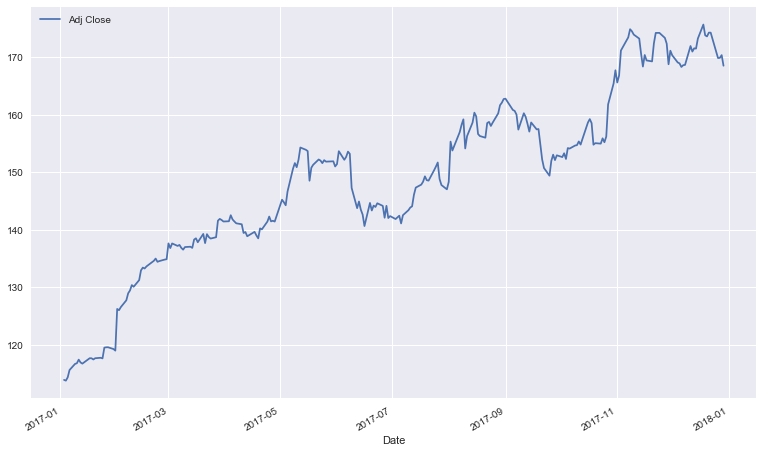

In [253]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(13,8))

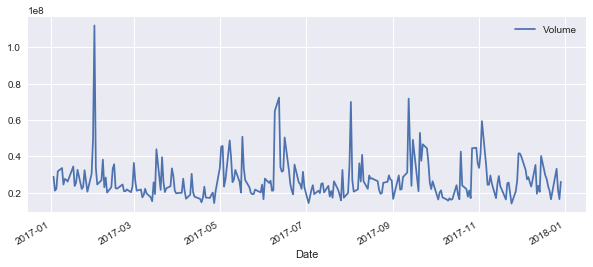

In [254]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))
# 1e9

### Calulating the Moving Average and Visualizaing it

In [62]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


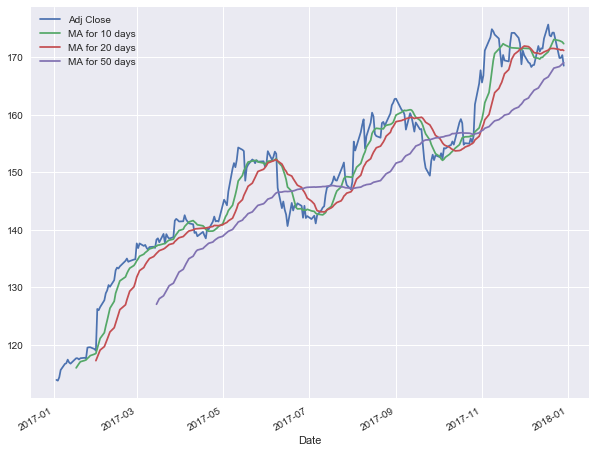

In [63]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,8))

### Daily Returns 

#### Calculating the Daily returns:

In [64]:
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

#### Visualizing the Daily returns

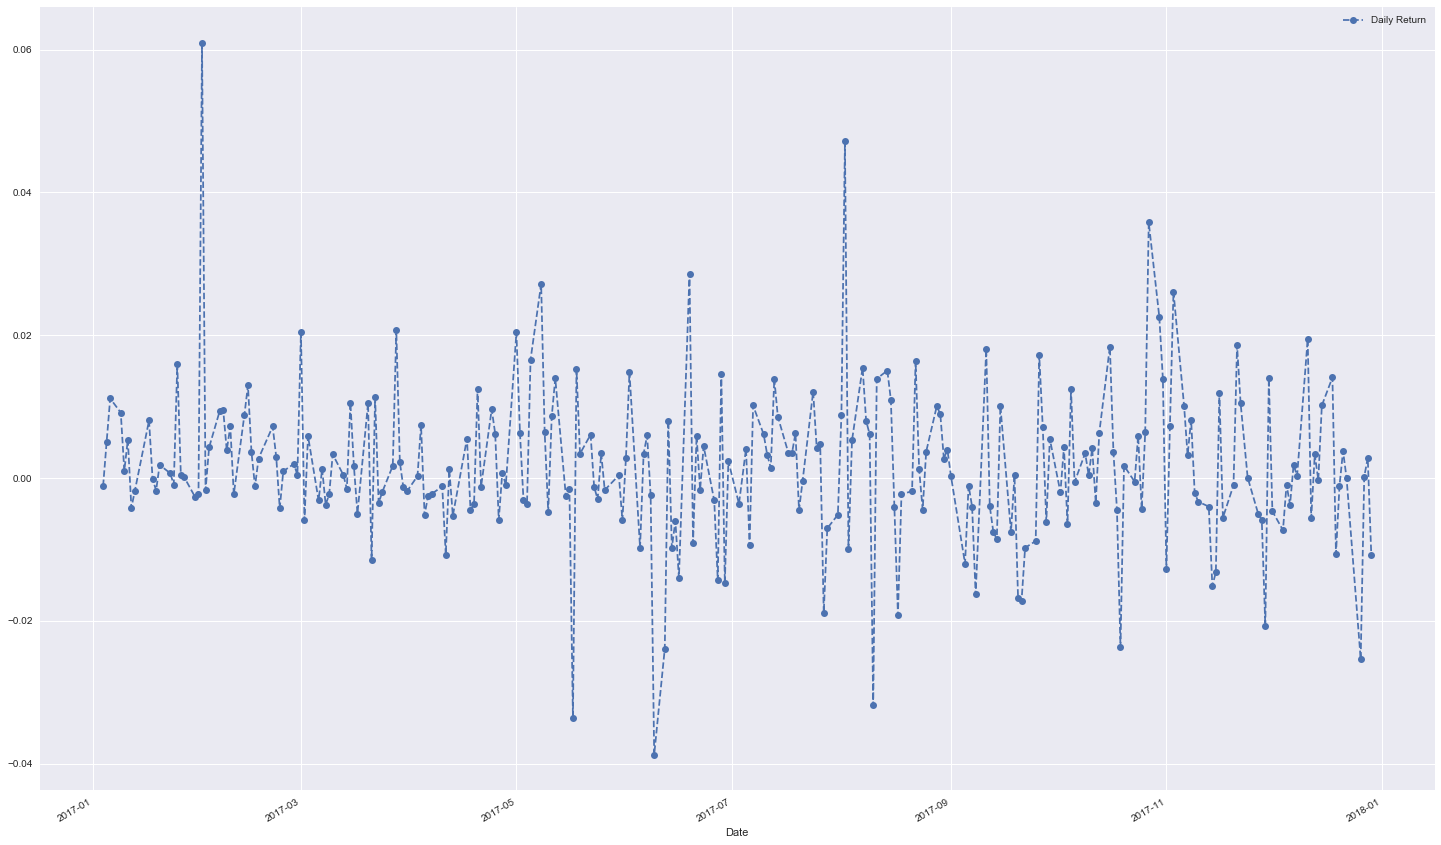

In [65]:
AAPL['Daily Return'].plot(figsize=(25,16),legend=True,linestyle='--',marker='o')

#### Average Daily Returns

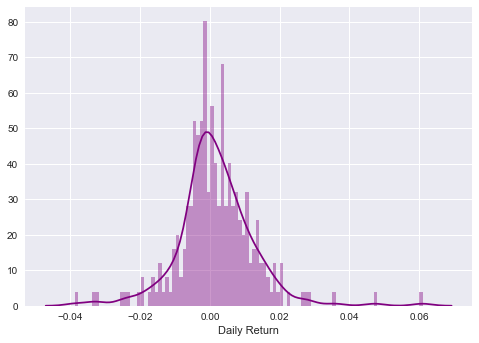

In [66]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

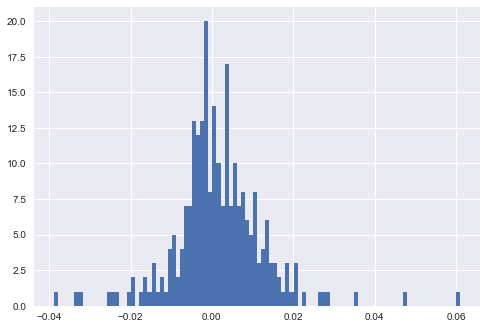

In [67]:
## Pandas histogram
AAPL['Daily Return'].hist(bins=100)

### Analyze the returns of all the stocks

In [68]:
closing_df = pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']

[*********************100%***********************]  4 of 4 downloaded


In [69]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-01-03,113.847588,753.669983,786.140015,60.926991
2017-01-04,113.720169,757.179993,786.900024,60.654381
2017-01-05,114.298470,780.450012,794.020020,60.654381
2017-01-06,115.572701,795.989990,806.150024,61.180119
2017-01-09,116.631287,796.919983,806.650024,60.985405


#### Creating a Dataframe tech_rets for Daily returns of every company stock 

In [70]:
tech_rets = closing_df.pct_change()

In [71]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.004657,0.000967,-0.004474
2017-01-05,0.005085,0.030732,0.009048,0.000000
2017-01-06,0.011148,0.019912,0.015277,0.008668
2017-01-09,0.009159,0.001168,0.000620,-0.003183


#### Now we can compare the daily percentage return of two stocks to check how correlated. 

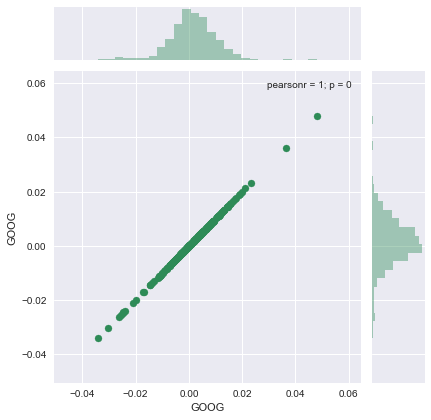

In [72]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

#### So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

#### Comparing GOOGLE and MICROSOFT Stocks

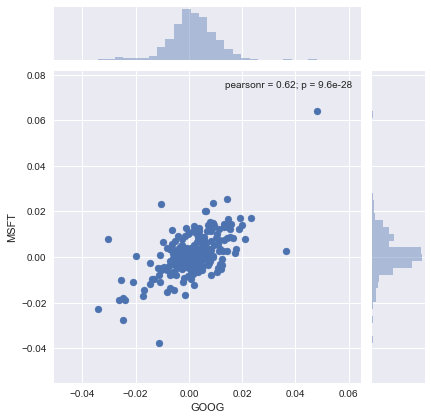

In [73]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

#### Pearsonr value officially known as the Pearson product-moment correlation coefficient
- How correlated the daily percentage returns are.

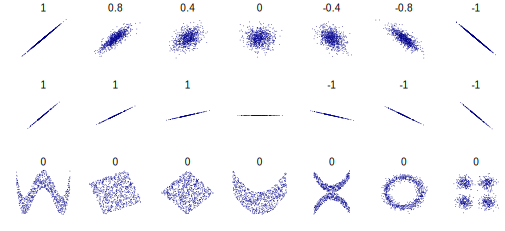

In [74]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

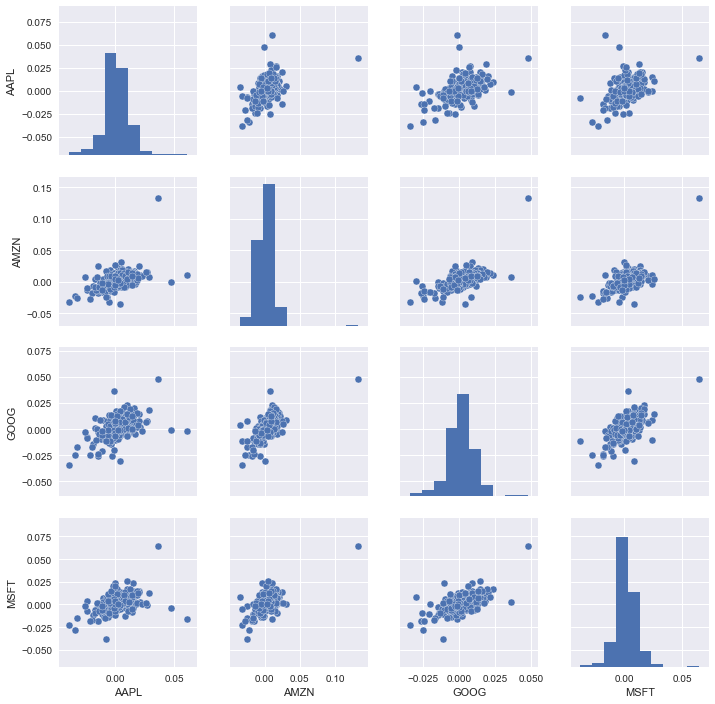

In [75]:
sns.pairplot(tech_rets.dropna())

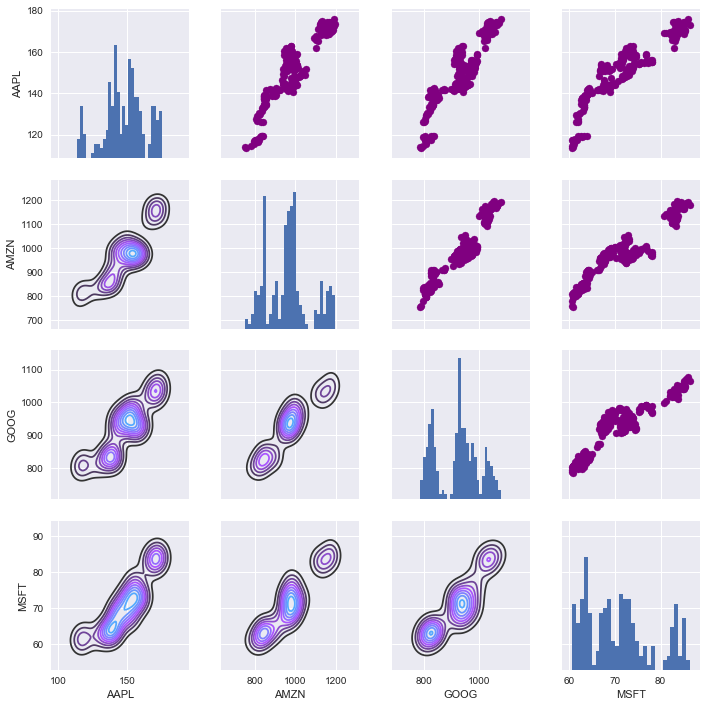

In [255]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In [265]:
from IPython.core.display import Image 


# Stock Price Predictions:

### There are two ways for stock price prediction:
<b>1) Financial Concepts such as Technical Indicators </b><br>
<b>2) Deep Learning with Time series data</b>
<br>
<br>
<br>

## Techincal Indicators:

### 1)Trend indicators
These technical indicators measure the direction and strength of a trend by comparing prices to an established baseline.<br>

<b> a) Moving Averages:</b>  Used to identify trends and reversals, as well as to set up support and resistance levels.<br>
<b> b) Parabolic Stop and Reverse (Parabolic SAR):</b>  Used to find potential reversals in the market price direction.<br>
<b> c) Moving Average Convergence Divergence (MACD):</b>  Used to reveal changes in the strength, direction, momentum, and duration of a trend in a stock’s price.<br>

### 2) Momentum indicators
These technical indicators may identify the speed of price movement by comparing the current closing price to previous closes.<br>

<b> a) Stochastic Oscillator:</b>  Used to predict price turning points by comparing the closing price to its price range.<br>
<b> b)Commodity Channel Index (CCI):</b>  An oscillator that helps identify price reversals, price extremes, and trend strength.<br>
<b> c)Relative Strength Index (RSI):</b>  Measures recent trading strength, velocity of change in the trend, and magnitude of the move.<br>

### 3) Volatility Indicators
These technical indicators measure the rate of price movement, regardless of direction.<br>

<b> a) Bollinger bands:</b>  Measures the “highness” or “lowness” of price, relative to previous trades.<br>
<b> b) Average True Range:</b>  Shows the degree of price volatility.<br>
<b> c) Standard Deviation:</b>  Used to measure expected risk and to determine the significance of certain price movements.<br>

### 4) Volume Indicators
These technical indicators measure the strength of a trend based on volume of shares traded.<br>

<b> a) Chaikin Oscillator:</b>  Monitors the flow of money in and out of the market, which can help determine tops and bottoms.<br>
<b> b) On-Balance Volume (OBV):</b>  Attempts to measure level of accumulation or distribution, by comparing volume to price.<br>
<b> c) Volume Rate of Change:</b>  Highlights increases in volume. These normally happen mostly at market tops, bottoms, or breakouts.<br>

### For these Project I will use Deep Learning for Stock Price Predictions:


#### ◈	Recurrent Neural Networks (RNN) are best for handling sequential data. 
#### ◈	RNNs share parameters across different positions/ index of time/ time steps of the sequence, which makes it possible to generalize well to examples of different sequence length. 

<br>


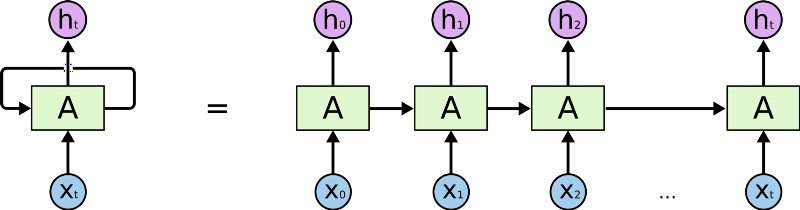

In [271]:
Image(filename='files/rnn.png')

#### The main drawbackof Recurrent Neural Network is Vanishing Gradient Problem



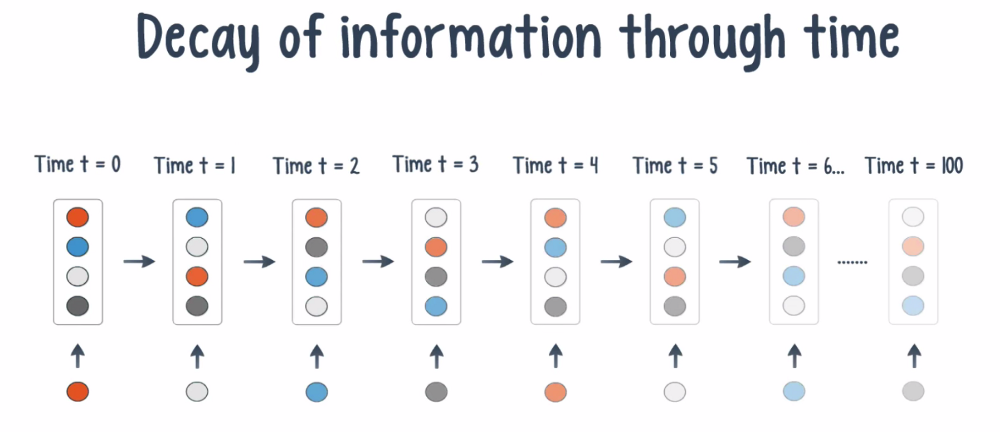

In [270]:
Image(filename='files/vgp.png')

### This problem was solved by Sepp Hochreiter and Jürgen Schmidhuber  in 1997 

#### Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). 
A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.



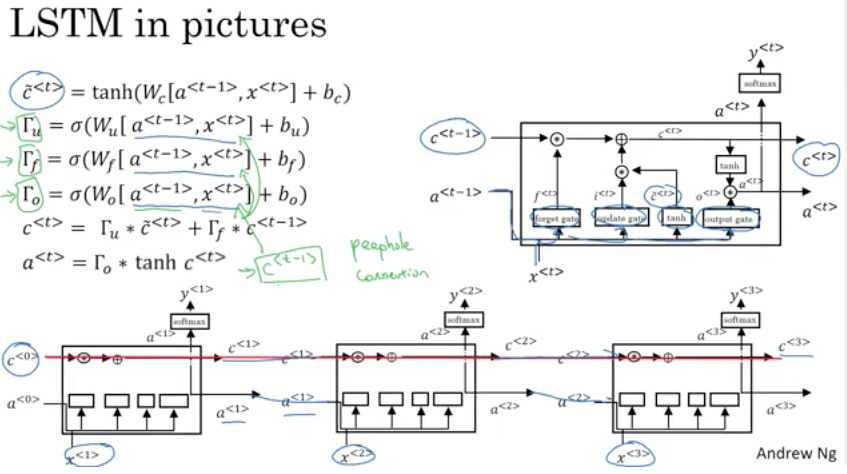

In [269]:
Image(filename='files/lstm_maths.png')

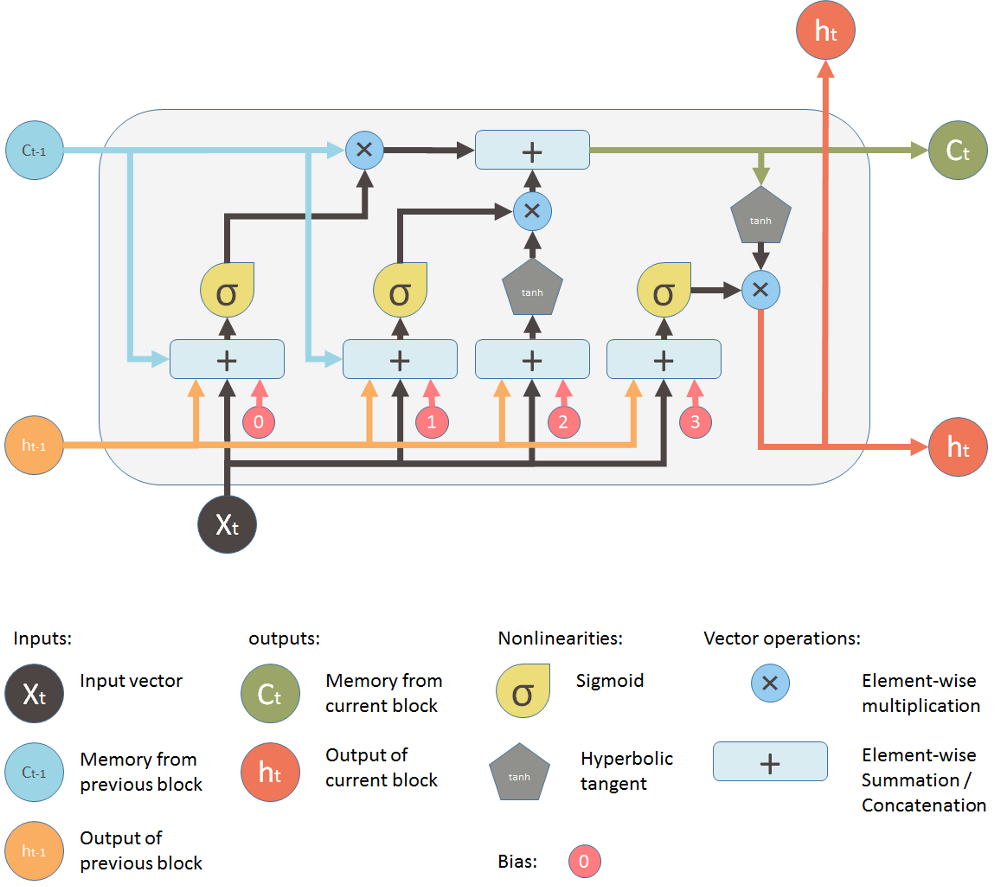

In [267]:
Image(filename='files/lstm_final.png')

In [213]:
training_start = "2012-01-01" 
training_end = "2017-01-01"
train = pdr.get_data_yahoo("GOOG",training_start,training_end)

[*********************100%***********************]  1 of 1 downloaded


In [214]:
train.shape


(1258, 6)

In [215]:
training_set = train.iloc[:, 0:1].values
training_set

array([[324.360352],
       [330.366272],
       [328.925659],
       ...,
       [793.700012],
       [783.330017],
       [782.75    ]])

In [216]:
test_start = "2017-01-01" 
test_end = "2017-01-31"
test = pdr.get_data_yahoo("GOOG",test_start,test_end)

[*********************100%***********************]  1 of 1 downloaded


In [217]:
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1272400


In [218]:
real_stock_price = test.iloc[:, 0:1].values

In [219]:
real_stock_price

array([[778.809998],
       [788.359985],
       [786.080017],
       [795.26001 ],
       [806.400024],
       [807.859985],
       [805.      ],
       [807.140015],
       [807.47998 ],
       [807.080017],
       [805.809998],
       [805.119995],
       [806.909973],
       [807.25    ],
       [822.299988],
       [829.619995],
       [837.809998],
       [834.710022],
       [814.659973],
       [796.859985]])

#### Feature Scaling

In [220]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [221]:
training_set_scaled

array([[0.08545249],
       [0.09660926],
       [0.09393314],
       ...,
       [0.95731171],
       [0.9380481 ],
       [0.93697064]])

#### Creating a data structure with 60 timesteps and 1 output

In [256]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [260]:
print(X_train)

[[0.08545249 0.09660926 0.09393314 ... 0.07812537 0.07999865 0.08461274]
 [0.09660926 0.09393314 0.09118315 ... 0.07999865 0.08461274 0.08591389]
 [0.09393314 0.09118315 0.07950958 ... 0.08461274 0.08591389 0.08435434]
 ...
 [0.92118079 0.92448743 0.93058039 ... 0.95482243 0.95211037 0.95170163]
 [0.92448743 0.93058039 0.93000453 ... 0.95211037 0.95170163 0.95731171]
 [0.93058039 0.93000453 0.93123052 ... 0.95170163 0.95731171 0.9380481 ]]


In [261]:
print(y_train)

[0.08591389 0.08435434 0.07422185 ... 0.95731171 0.9380481  0.93697064]


#### Reshaping


In [223]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Part 2 - Building the LSTM

#### Importing the Keras libraries 

In [224]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initialising the LSTM

In [225]:
regressor = Sequential()

#### Adding the first LSTM layer and some Dropout regularisation

In [226]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


#### Adding a second LSTM layer and some Dropout regularisation

In [227]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a third LSTM layer and some Dropout regularisation

In [228]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a fourth LSTM layer and some Dropout regularisation

In [229]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#### Adding the output layer

In [230]:
regressor.add(Dense(units = 1))

#### Compiling the LSTM

In [231]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Fitting the LSTM to the Training set

In [232]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 39s - loss: 0.0475    
Epoch 2/100
1198/1198 [==============================] - 35s - loss: 0.0069    
Epoch 3/100
1198/1198 [==============================] - 1546s - loss: 0.0056   
Epoch 4/100
1198/1198 [==============================] - 36s - loss: 0.0055    
Epoch 5/100
1198/1198 [==============================] - 35s - loss: 0.0048    
Epoch 6/100
1198/1198 [==============================] - 35s - loss: 0.0042    
Epoch 7/100
1198/1198 [==============================] - 34s - loss: 0.0043    
Epoch 8/100
1198/1198 [==============================] - 35s - loss: 0.0040    
Epoch 9/100
1198/1198 [==============================] - 35s - loss: 0.0042    
Epoch 10/100
1198/1198 [==============================] - 2034s - loss: 0.0053   
Epoch 11/100
1198/1198 [==============================] - 35s - loss: 0.0046    
Epoch 12/100
1198/1198 [==============================] - 35s - loss: 0.0040    
Epoch 13/100
1198/1198 [===========

In [233]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

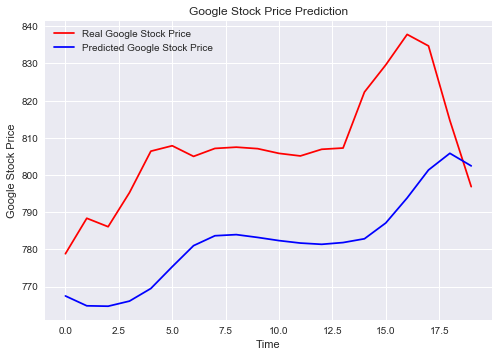

In [234]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [235]:
def cal_target(df):
    list_y =[]
    temp = df
    for i in range(len(temp)-1):
        if temp[i+1] > temp[i]:
            y = 1
        else:
            y = -1
            
        list_y.append(y)
    ydf = pd.DataFrame(list_y)
    return ydf

In [236]:
real_stock_price_trend = cal_target(real_stock_price)
predicted_stock_price_trend =cal_target(predicted_stock_price)

###  Stock Price Trend Prediction:

In [264]:
real_df = pd.DataFrame(real_stock_price_trend)
pred_df = pd.DataFrame(predicted_stock_price_trend)
acc_df = pd.concat((real_df[0],pred_df[0]), axis=1)
acc_df.head(29)

,0,0
0,1,-1
1,-1,-1
2,1,1
3,1,1
4,1,1
5,-1,1
6,1,1
7,1,1
8,-1,-1
9,-1,-1


In [242]:
from sklearn.metrics import accuracy_score
score = accuracy_score(real_stock_price_trend, predicted_stock_price_trend)
print(score)


0.7368421052631579


### Accuracy Score of 0.7368421052631579

In [240]:
from sklearn.metrics import classification_report
print(classification_report(real_stock_price_trend, predicted_stock_price_trend))

             precision    recall  f1-score   support

         -1       0.71      0.62      0.67         8
          1       0.75      0.82      0.78        11

avg / total       0.73      0.74      0.73        19

